In [66]:
import os
import random
import sys

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

#from sklearn.svm import SVR
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

#from sklearn.linear_model import Ridge

from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error
#from sklearn.multioutput import MultiOutputRegressor
import math
#from yellowbrick.regressor import ResidualsPlot
#from sklearn.metrics import r2_score
import sklearn.gaussian_process as gp
import matplotlib.pyplot as plt


In [55]:
df = pd.read_excel('database_new.xlsx')

# Leave fraction of coating: ==40, 50, 60 as test set

In [16]:


# Load dataset

train_set=df[(df['fraction_of_coating']<40) | (df['fraction_of_coating']>60)]
test_set=df[(df['fraction_of_coating']>=40) & (df['fraction_of_coating']<=60)]
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

scaling_x = StandardScaler()
scaling_y = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)

regressor = KernelRidge(alpha=0.0001, gamma=0.5, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
# Y_pred=wrapper.predict(X_test)

Y_pred = scaling_y.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)




Mean absolute error on test set:  [0.05222492 0.06557988 0.15372218]
Mean absolute error on test set [q_abs, q_sca, g]:-   [0.05222492 0.06557988 0.15372218]


<AxesSubplot:>

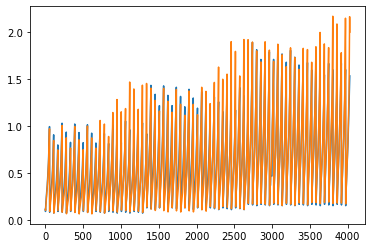

In [17]:
ax=Y_test['q_abs'].plot()
Y_pred['q_abs'].plot(ax=ax)

<AxesSubplot:>

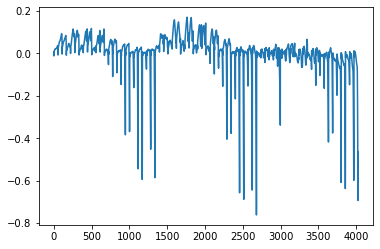

In [18]:
Y_diff['q_abs'].plot()

<AxesSubplot:>

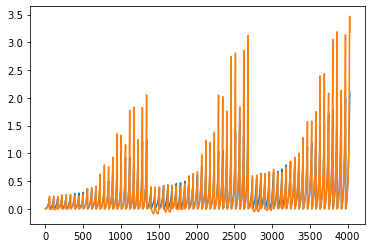

In [19]:
ax=Y_test['q_sca'].plot()
Y_pred['q_sca'].plot(ax=ax)

<AxesSubplot:>

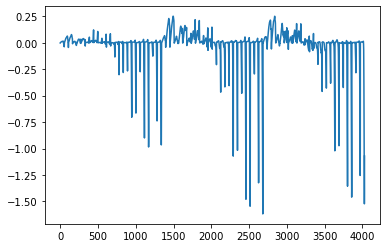

In [20]:
Y_diff['q_sca'].plot()

<AxesSubplot:>

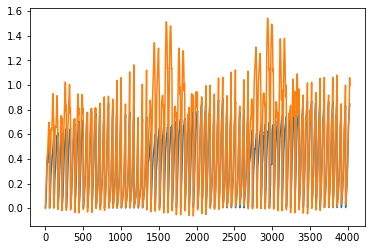

In [21]:
ax=Y_test['g'].plot()
Y_pred['g'].plot(ax=ax)

<AxesSubplot:>

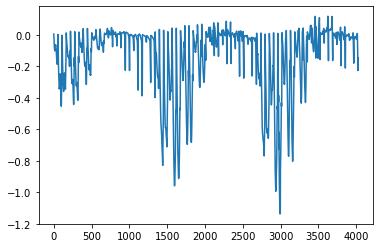

In [22]:
Y_diff['g'].plot()

<AxesSubplot:>

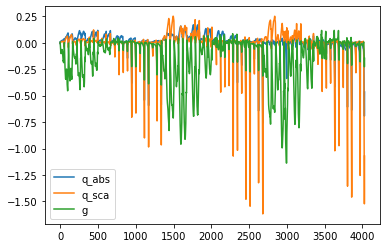

In [23]:
Y_diff.plot()

# Leave fraction of coating: == 70,80,90 as test set

In [56]:
train_set = df[(df['fraction_of_coating'] < 70)]
test_set = df[(df['fraction_of_coating'] >= 70)]

Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

scaling_x = Min()
scaling_y = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)

regressor = KernelRidge(alpha=0.0001, gamma=0.5, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
# Y_pred=wrapper.predict(X_test)

Y_pred = scaling_y.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)




Mean absolute error on test set:  [0.3233678  0.24135401 0.24832251]
Mean absolute error on test set [q_abs, q_sca, g]:-   [0.3233678  0.24135401 0.24832251]


<AxesSubplot:>

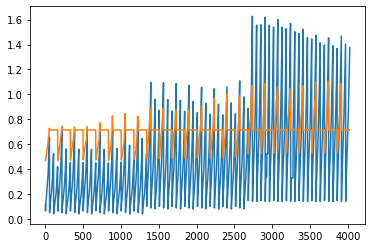

In [57]:
ax=Y_test['q_abs'].plot()
Y_pred['q_abs'].plot(ax=ax)

<AxesSubplot:>

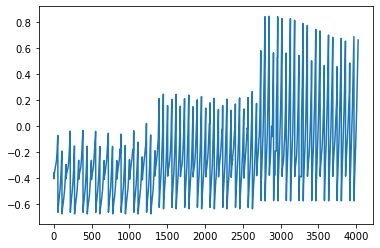

In [11]:
Y_diff['q_abs'].plot()

<AxesSubplot:>

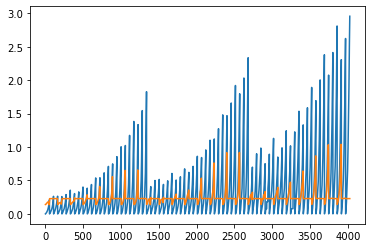

In [8]:
ax=Y_test['q_sca'].plot()
Y_pred['q_sca'].plot(ax=ax)

<AxesSubplot:>

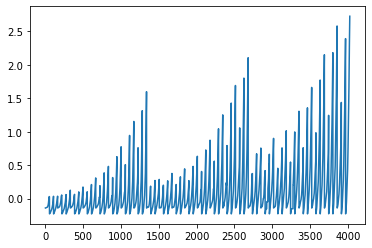

In [12]:
Y_diff['q_sca'].plot()

<AxesSubplot:>

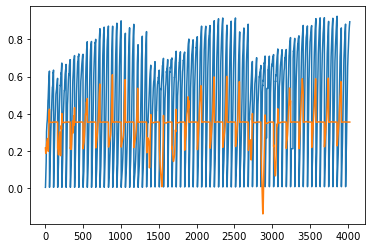

In [9]:
ax=Y_test['g'].plot()
Y_pred['g'].plot(ax=ax)

<AxesSubplot:>

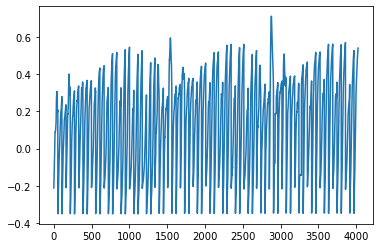

In [13]:
Y_diff['g'].plot()

<AxesSubplot:>

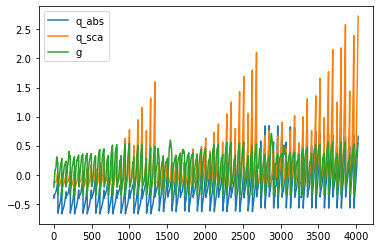

In [10]:
Y_diff.plot()

In [3]:
#sorted

# Leave fraction of coating: ==40, 50, 60 as test set

In [4]:


# Load dataset
df.sort_values(by=['fraction_of_coating'], inplace=True)
train_set=df[(df['fraction_of_coating']<40) | (df['fraction_of_coating']>60)]
test_set=df[(df['fraction_of_coating']>=40) & (df['fraction_of_coating']<=60)]
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

scaling_x = StandardScaler()
scaling_y = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)

regressor = KernelRidge(alpha=0.0001, gamma=0.5, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
# Y_pred=wrapper.predict(X_test)

Y_pred = scaling_y.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)




Mean absolute error on test set:  [0.05222492 0.06557988 0.15372218]
Mean absolute error on test set [q_abs, q_sca, g]:-   [0.05222492 0.06557988 0.15372218]


<AxesSubplot:>

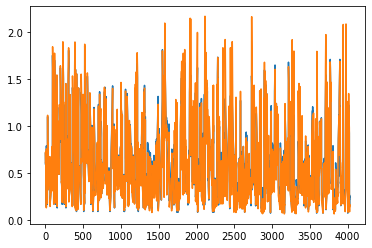

In [5]:
ax=Y_test['q_abs'].plot()
Y_pred['q_abs'].plot(ax=ax)

<AxesSubplot:>

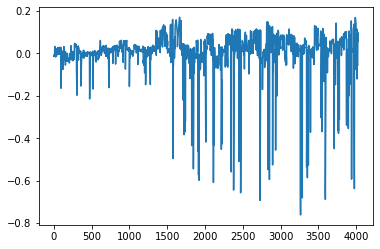

In [6]:
Y_diff['q_abs'].plot()

<AxesSubplot:>

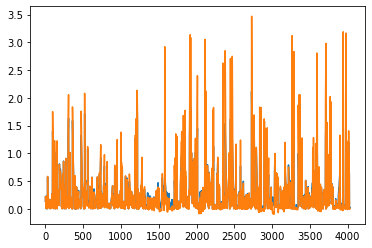

In [7]:
ax=Y_test['q_sca'].plot()
Y_pred['q_sca'].plot(ax=ax)

<AxesSubplot:>

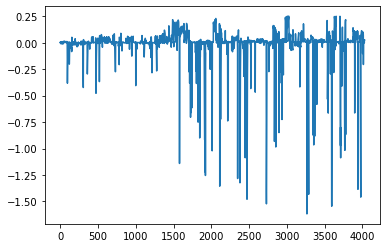

In [8]:
Y_diff['q_sca'].plot()

<AxesSubplot:>

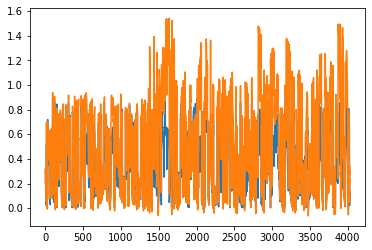

In [9]:
ax=Y_test['g'].plot()
Y_pred['g'].plot(ax=ax)

<AxesSubplot:>

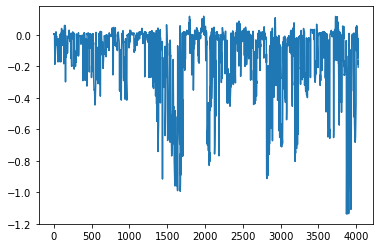

In [10]:
Y_diff['g'].plot()

<AxesSubplot:>

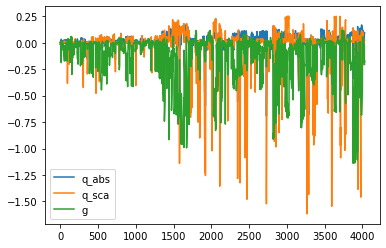

In [11]:
Y_diff.plot()

In [12]:
#sorted

# Leave fraction of coating: == 70,80,90 as test set

In [83]:
df = pd.read_excel('database_new.xlsx')


train_set = df[(df['fraction_of_coating'] < 70)]
test_set = df[(df['fraction_of_coating'] >= 70)]
test_set.sort_values(by=['fraction_of_coating'], inplace=True)
test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

scaling_x = MinMaxScaler()
scaling_y = MinMaxScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)

regressor = KernelRidge(alpha=0.0001, gamma=0.5, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
# Y_pred=wrapper.predict(X_test)

Y_pred = scaling_y.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)




C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Mean absolute error on test set:  [0.20866494 0.3051674  0.31096897]
Mean absolute error on test set [q_abs, q_sca, g]:-   [0.20866494 0.3051674  0.31096897]


<AxesSubplot:>

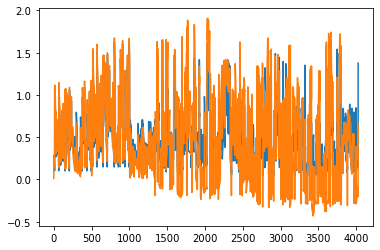

In [84]:
ax=Y_test['q_abs'].plot()
Y_pred['q_abs'].plot(ax=ax)

<AxesSubplot:>

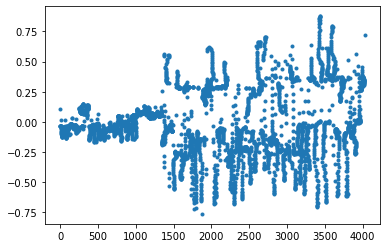

In [85]:
Y_diff['q_abs'].plot(style='.')

<AxesSubplot:>

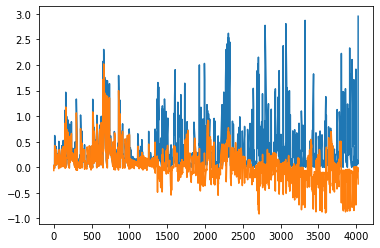

In [86]:
ax=Y_test['q_sca'].plot()
Y_pred['q_sca'].plot(ax=ax)

<AxesSubplot:>

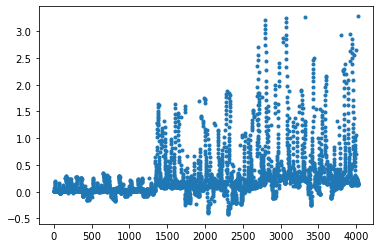

In [87]:
Y_diff['q_sca'].plot(style='.')

<AxesSubplot:>

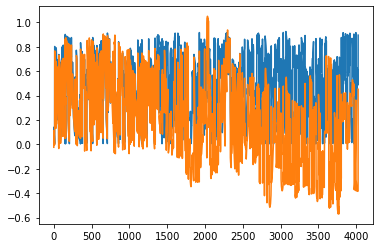

In [88]:
ax=Y_test['g'].plot()
Y_pred['g'].plot(ax=ax)

<AxesSubplot:>

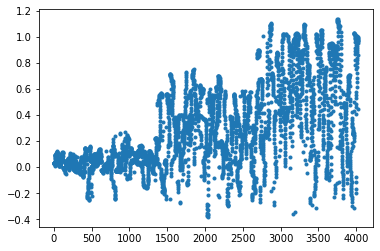

In [89]:
Y_diff['g'].plot(style='.')

<AxesSubplot:>

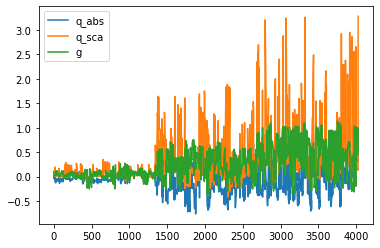

In [90]:
Y_diff.plot()

In [53]:
df.sort_values(by=['fraction_of_coating'], inplace=True)
df['fraction_of_coating']

0         0
3         0
4         0
5         0
6         0
         ..
18519    90
18520    90
18521    90
17855    90
18525    90
Name: fraction_of_coating, Length: 18526, dtype: int64

In [37]:
df['fraction_of_coating'][14000]

1

In [38]:
df.reset_index(inplace=True)
df.drop('index',axis=1, inplace=True)

In [39]:
df['fraction_of_coating']

0         0
1         0
2         0
3         0
4         0
         ..
18521    90
18522    90
18523    90
18524    90
18525    90
Name: fraction_of_coating, Length: 18526, dtype: int64

# NN

In [97]:


import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from keras.regularizers import l2





# Load dataset
df = pd.read_excel('database_new.xlsx')
X = df.iloc[:, :8]
Y = df.iloc[:, 25:28]


train_set = df[(df['fraction_of_coating'] < 70)]
test_set = df[(df['fraction_of_coating'] >= 70)]
test_set.sort_values(by=['fraction_of_coating'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
print(len(test_set))

Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]
"""
# Standardizing data and targets
scaling_x = StandardScaler()
scaling_y = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)
Y_test = scaling_y.transform(Y_test)
"""
# Normalizaing Min max
scaling_x = MinMaxScaler()
scaling_y = MinMaxScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)
Y_test = scaling_y.transform(Y_test)
# Build NN model

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(8,)))


model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))


model.add(Dense(3, kernel_initializer='glorot_normal', activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])

print(model.summary())

# Running and logging model plus Early stopping


    # print(model_file.name)
checkpoint = ModelCheckpoint('fraction_of_coating/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

    # # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

    # log_csv = CSVLogger('fractal_dimension_loss_logs.csv', separator=',', append=False)

callback_list = [checkpoint, es]
history = model.fit(X_train, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)

    # choose the best Weights for prediction

    # Save the model

    # Save metrics loss and val_loss
    # print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('fraction_of_coating/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Evaluate plus inverse transforms

# Inverse transform
Y_test = scaling_y.inverse_transform(Y_test)
Y_pred = model.predict(X_test)
Y_pred = scaling_y.inverse_transform(Y_pred)

# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])
# Y_test.reset_index(inplace=True, drop=True)

Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])

Y_diff = Y_test - Y_pred

error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)



C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


4026
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               4608      
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 1539      
Total params: 268,803
Trainable params: 268,803
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
363/363 [==============================] - 2s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0515 - val_loss: 0.0254 - val_mean_absolute_error: 0.0844

Epoch 00001: val_loss improved from inf to 0.02542, saving model to fraction_of_coating\best_model.hdf5
Epoch 2/1000
363/363 [==============================] - 2s 4ms/step - loss: 6.7702e-04 - mean_abs


Epoch 00031: val_loss improved from 0.00035 to 0.00035, saving model to fraction_of_coating\best_model.hdf5
Epoch 32/1000
363/363 [==============================] - 2s 4ms/step - loss: 7.8884e-05 - mean_absolute_error: 0.0051 - val_loss: 3.9405e-04 - val_mean_absolute_error: 0.0132

Epoch 00032: val_loss did not improve from 0.00035
Epoch 33/1000
363/363 [==============================] - 2s 4ms/step - loss: 7.7854e-05 - mean_absolute_error: 0.0051 - val_loss: 4.2365e-04 - val_mean_absolute_error: 0.0133

Epoch 00033: val_loss did not improve from 0.00035
Epoch 34/1000
363/363 [==============================] - 2s 4ms/step - loss: 7.9818e-05 - mean_absolute_error: 0.0053 - val_loss: 4.7517e-04 - val_mean_absolute_error: 0.0141

Epoch 00034: val_loss did not improve from 0.00035
Epoch 35/1000
363/363 [==============================] - 2s 4ms/step - loss: 7.6178e-05 - mean_absolute_error: 0.0050 - val_loss: 3.7785e-04 - val_mean_absolute_error: 0.0115

Epoch 00035: val_loss did not impr

363/363 [==============================] - 2s 5ms/step - loss: 4.5959e-05 - mean_absolute_error: 0.0038 - val_loss: 4.1606e-04 - val_mean_absolute_error: 0.0124

Epoch 00067: val_loss did not improve from 0.00027
Epoch 68/1000
363/363 [==============================] - 2s 6ms/step - loss: 4.4812e-05 - mean_absolute_error: 0.0039 - val_loss: 3.5633e-04 - val_mean_absolute_error: 0.0118

Epoch 00068: val_loss did not improve from 0.00027
Epoch 69/1000
363/363 [==============================] - 2s 5ms/step - loss: 4.3401e-05 - mean_absolute_error: 0.0037 - val_loss: 3.8549e-04 - val_mean_absolute_error: 0.0123

Epoch 00069: val_loss did not improve from 0.00027
Epoch 70/1000
363/363 [==============================] - 2s 5ms/step - loss: 4.2455e-05 - mean_absolute_error: 0.0037 - val_loss: 4.4238e-04 - val_mean_absolute_error: 0.0129

Epoch 00070: val_loss did not improve from 0.00027
Epoch 71/1000
363/363 [==============================] - 2s 5ms/step - loss: 4.1552e-05 - mean_absolute_er

363/363 [==============================] - 2s 5ms/step - loss: 3.2889e-05 - mean_absolute_error: 0.0034 - val_loss: 3.4057e-04 - val_mean_absolute_error: 0.0113

Epoch 00103: val_loss did not improve from 0.00025
Epoch 104/1000
363/363 [==============================] - 2s 5ms/step - loss: 3.2210e-05 - mean_absolute_error: 0.0032 - val_loss: 5.1634e-04 - val_mean_absolute_error: 0.0145

Epoch 00104: val_loss did not improve from 0.00025
Epoch 105/1000
363/363 [==============================] - 2s 5ms/step - loss: 3.1602e-05 - mean_absolute_error: 0.0032 - val_loss: 3.7015e-04 - val_mean_absolute_error: 0.0120

Epoch 00105: val_loss did not improve from 0.00025
Epoch 106/1000
107/363 [=======>......................] - ETA: 1s - loss: 2.8268e-05 - mean_absolute_error: 0.0030

KeyboardInterrupt: 

<AxesSubplot:>

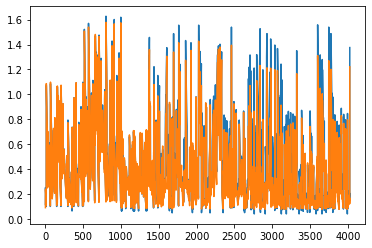

In [92]:
ax=Y_test['q_abs'].plot()
Y_pred['q_abs'].plot(ax=ax)

<AxesSubplot:>

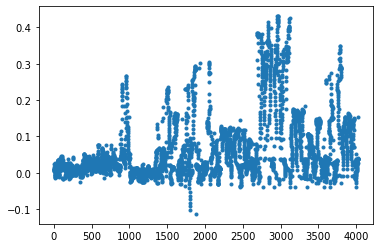

In [93]:
Y_diff['q_abs'].plot(style='.')

<AxesSubplot:>

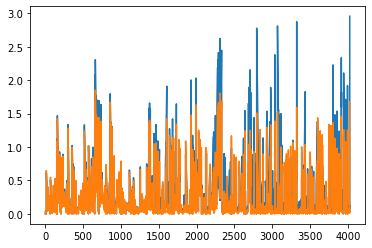

In [94]:
ax=Y_test['q_sca'].plot()
Y_pred['q_sca'].plot(ax=ax)

<AxesSubplot:>

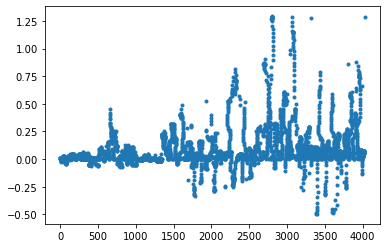

In [95]:
Y_diff['q_sca'].plot(style='.')

<AxesSubplot:>

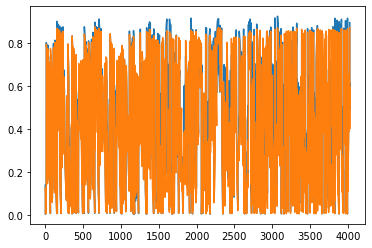

In [80]:
ax=Y_test['g'].plot()
Y_pred['g'].plot(ax=ax)

<AxesSubplot:>

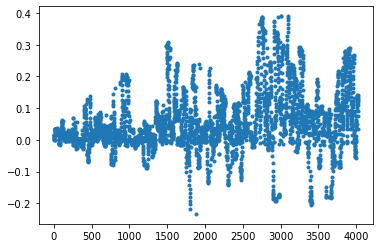

In [96]:
Y_diff['g'].plot(style='.')

<AxesSubplot:>

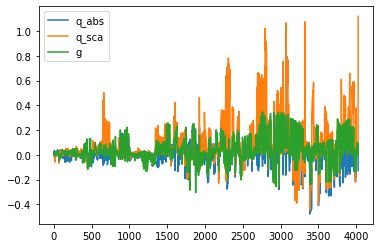

In [82]:
Y_diff.plot()

# NN

In [98]:


import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from keras.regularizers import l2





# Load dataset
df = pd.read_excel('database_new.xlsx')
X = df.iloc[:, :8]
Y = df.iloc[:, 25:28]


train_set = df[(df['fraction_of_coating'] < 70)]
test_set = df[(df['fraction_of_coating'] >= 70)]
test_set.sort_values(by=['fraction_of_coating'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
print(len(test_set))

Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]
"""
# Standardizing data and targets
scaling_x = StandardScaler()
scaling_y = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)
Y_test = scaling_y.transform(Y_test)
"""
# Normalizaing Min max
scaling_x = MinMaxScaler()
scaling_y = MinMaxScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)
Y_test = scaling_y.transform(Y_test)
# Build NN model

# Running and logging model plus Early stopping


    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('fraction_of_coating/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Evaluate plus inverse transforms

# Inverse transform
Y_test = scaling_y.inverse_transform(Y_test)
Y_pred = model.predict(X_test)
Y_pred = scaling_y.inverse_transform(Y_pred)

# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])
# Y_test.reset_index(inplace=True, drop=True)

Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])

Y_diff = Y_test - Y_pred

error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)



C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


4026
Mean absolute error on test set [q_abs, q_sca, g]:-   [0.05349568 0.10687181 0.07485016]


<AxesSubplot:>

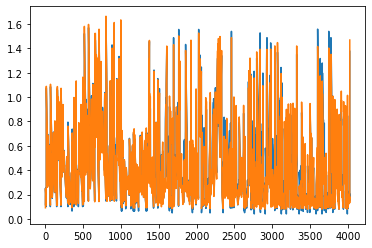

In [99]:
ax=Y_test['q_abs'].plot()
Y_pred['q_abs'].plot(ax=ax)

<AxesSubplot:>

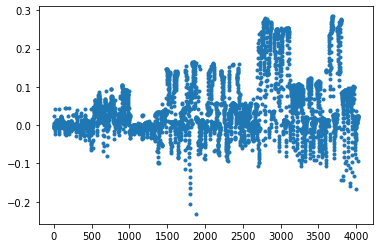

In [100]:
Y_diff['q_abs'].plot(style='.')

<AxesSubplot:>

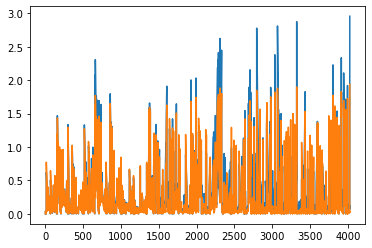

In [101]:
ax=Y_test['q_sca'].plot()
Y_pred['q_sca'].plot(ax=ax)

<AxesSubplot:>

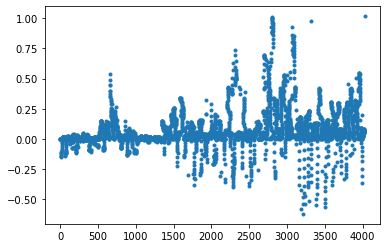

In [102]:
Y_diff['q_sca'].plot(style='.')

<AxesSubplot:>

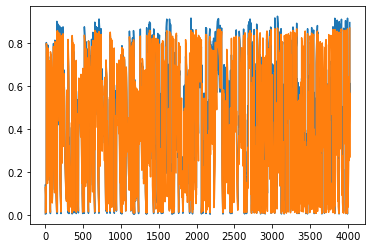

In [103]:
ax=Y_test['g'].plot()
Y_pred['g'].plot(ax=ax)

<AxesSubplot:>

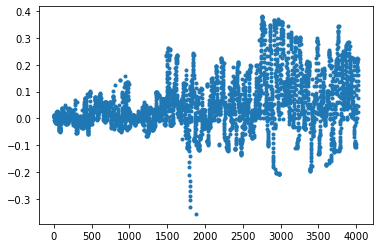

In [104]:
Y_diff['g'].plot(style='.')

<AxesSubplot:>

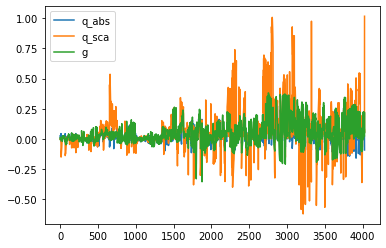

In [105]:
Y_diff.plot()